# **Insights into Urban Dynamics:** Analyzing Airbnb Reviews and Neighborhood Metrics
---
### Project Overview

This study aims to investigate the correlation between subjective Airbnb reviews and objective neighborhood metrics in select US cities. It involves analyzing crime statistics, demographics, socioeconomic indicators, and environmental quality to understand how they relate to sentiments expressed in Airbnb reviews.

---
### Objectives

- Investigate correlations between subjective reviews and quantifiable neighborhood attributes in targeted US cities.
- Understand how guest experiences align with tangible neighborhood characteristics.
---
### Methodologies and Tools

- **Data Collection**: Utilize Python libraries (e.g., Pandas, Requests) for data collection and preprocessing.
- **Sentiment Analysis**: Implement TextBlob for sentiment analysis of Airbnb reviews and consider numerical ratings.
- **Correlation Techniques**: Employ regression analysis, correlation coefficients and other analysis techniques(cluster, principle component, etc.)
- **Visualization**: Use Matplotlib or Plotly or Seaborn for visual representation of relationships.
---
### Data Sources
We extracted data from: 
- Inside Airbnb 
http://insideairbnb.com/get-the-data/
- Cost of Living
https://www.kaggle.com/code/eugeniokukes/us-cost-of-living/notebook
- EPA

---

# **Data Preprocessing**

### Import dependencies

In [37]:
!pip install seaborn matplotlib
!pip install scikit-learn
!pip install textblob
!python -m textblob.download_corpora
!pip install geopandas

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\12039\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\12039\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\12039\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\12039\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\12039\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\12039\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [38]:
import pandas as pd
import requests
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
import zipfile
import geopandas as gpd
import glob

## **Location specific data**

### Pull and clean cost of living file -- **HAVING A LOT OF TROUBLE MAPPING TO LISTING FILE**

In [39]:
cost_of_living = pd.read_csv('https://raw.githubusercontent.com/kflemming30/Urban_Dynamics_and_Airbnb_Reviews/main/cost_of_living_us.csv')
cost_of_living.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


In [4]:
cost_of_living.dtypes

case_id                     int64
state                      object
isMetro                      bool
areaname                   object
county                     object
family_member_count        object
housing_cost              float64
food_cost                 float64
transportation_cost       float64
healthcare_cost           float64
other_necessities_cost    float64
childcare_cost            float64
taxes                     float64
total_cost                float64
median_family_income      float64
dtype: object

In [5]:
cost_of_living.family_member_count.unique()

array(['1p0c', '1p1c', '1p2c', '1p3c', '1p4c', '2p0c', '2p1c', '2p2c',
       '2p3c', '2p4c'], dtype=object)

In [40]:
cost_of_living[['adult_count', 'child_count']] = cost_of_living['family_member_count'].str.extract(r'(\d+)p(\d+)c').astype(int)
cost_of_living.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4


In [45]:
cost_of_living['state'] = cost_of_living['areaname'].str.extract(r',\s*([A-Z]{2})\s+MSA', expand=False)
cost_of_living.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,county_state
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,"Autauga County, AL"
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,"Autauga County, AL"
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,"Autauga County, AL"
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,"Autauga County, AL"
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,"Autauga County, AL"


In [47]:
cost_of_living['county_state'] = cost_of_living['county'] + ', ' + cost_of_living['state']
cost_of_living.head()

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,county_state
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,"Autauga County, AL"
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,"Autauga County, AL"
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,"Autauga County, AL"
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,"Autauga County, AL"
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,"Autauga County, AL"


In [46]:
# Check for null values
null_values = cost_of_living.isnull().sum()

# Check for zeros
zero_values = (cost_of_living == 0).sum()

# Display the count of null and zero values
print("Null Values:")
print(null_values)

print("\nZero Values:")
print(zero_values)

Null Values:
case_id                       0
state                     27330
isMetro                       0
areaname                      0
county                        0
family_member_count           0
housing_cost                  0
food_cost                     0
transportation_cost           0
healthcare_cost               0
other_necessities_cost        0
childcare_cost                0
taxes                         0
total_cost                    0
median_family_income         10
adult_count                   0
child_count                   0
county_state              27330
dtype: int64

Zero Values:
case_id                       0
state                         0
isMetro                   19730
areaname                      0
county                        0
family_member_count           0
housing_cost                  0
food_cost                     0
transportation_cost           0
healthcare_cost               0
other_necessities_cost        0
childcare_cost             6286


In [34]:
# Calculate averages by 'areaname'
averages_by_county = cost_of_living.groupby('county_state').mean()

# Display the averages
averages_by_county

C:\Users\12039\AppData\Local\Temp\ipykernel_17872\1904981531.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averages_by_county = cost_of_living.groupby('county_state').mean()


,case_id,isMetro,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count
county_state,,,,,,,,,,,,,
"Adams County, CO",245.0,1.0,20682.303960,8649.499560,13779.927156,9901.594644,10628.069040,15980.958720,13441.132260,93063.48384,82814.546875,1.5,2.0
"Adams County, PA",2272.0,1.0,12780.000000,9750.833364,14166.313908,13776.743988,8163.809520,14797.367040,10952.771748,84387.83964,83362.875000,1.5,2.0
"Alachua County, FL",327.0,1.0,14166.250464,9374.768124,12359.205156,13552.625664,8529.839520,9027.581760,6440.893332,73451.16420,77956.632812,1.5,2.0
"Alamance County, NC",1918.0,1.0,11234.400000,8031.678264,12514.607568,11547.658968,6980.859852,10345.299504,7469.839932,68124.34296,66801.195312,1.5,2.0
"Albany County, NY",1856.0,1.0,14176.993140,9723.971100,12159.220164,12392.769552,8660.261580,20305.585392,13220.411472,90639.21264,97041.218750,1.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yakima County, WA",3021.0,1.0,13874.400000,8058.540012,13927.057152,10140.993672,7947.169260,12354.498792,6326.561724,72629.21988,60888.730469,1.5,2.0
"Yavapai County, AZ",110.0,1.0,13867.200000,8918.117472,13687.442736,16066.121004,8256.019236,12586.064856,9842.358948,83223.32424,66341.179688,1.5,2.0
"York County, PA",2338.0,1.0,12181.200000,8676.360984,13243.724388,13776.743988,7557.516888,14232.862944,9778.220364,79446.62988,80899.515625,1.5,2.0


In [33]:
city_county_mapping = {
    'Los Angeles, CA': 'Los Angeles County, CA',
    'Oakland, CA': 'Alameda County, CA',
    'Seattle, WA': 'King County, WA',
    'Boston, MA': 'Suffolk County, MA',
    'New York, NY': 'New York County, NY',
    'New Orleans, LA': 'Orleans Parish, LA',
    'Austin, TX': 'Travis County, TX',
    'Chicago, IL': 'Cook County, IL',
    'Nashville, TN': 'Davidson County, TN'
}


In [36]:
# Add a new column 'listing_city' based on the mapping
averages_by_county['listing_city'] = averages_by_county.index.map(lambda x: next((city for city, county in city_county_mapping.items() if county in x), 'Unknown'))

averages_by_county['listing_city']

county_state
Adams County, CO       Unknown
Adams County, PA       Unknown
Alachua County, FL     Unknown
Alamance County, NC    Unknown
Albany County, NY      Unknown
                        ...   
Yakima County, WA      Unknown
Yavapai County, AZ     Unknown
York County, PA        Unknown
Yuba County, CA        Unknown
Yuma County, AZ        Unknown
Name: listing_city, Length: 410, dtype: object

In [24]:
# Get unique county names from the DataFrame
unique_counties_in_dataframe = set(averages_by_areaname.index)

# Get unique counties mapped to cities in the mapping dictionary
counties_mapped_to_cities = set(county for city, county in city_county_mapping.items())

# Find counties not mapped to any city
unmapped_counties = unique_counties_in_dataframe - counties_mapped_to_cities

print("Counties not mapped to any city:")
print(unmapped_counties)


Counties not mapped to any city:
{'Atascosa County, TX HUD Metro FMR Area', 'Tillamook County, OR', 'Colorado County, TX', 'Nacogdoches County, TX', 'Montgomery County, IL', 'Red Willow County, NE', 'Springfield, IL MSA', 'Ravalli County, MT', 'Chickasaw County, MS', 'Clark County, ID', 'Gibson County, IN', 'Simpson County, MS HUD Metro FMR Area', 'State College, PA MSA', 'Pender County, NC HUD Metro FMR Area', 'Cibola County, NM', 'Hemphill County, TX', 'Adair County, KY', 'Logan County, CO', 'Rice County, MN', 'Wallace County, KS', 'Greene County, NY', 'Union County, AR', 'Red River Parish, LA', 'Bay City, MI MSA', 'Lyon County, KS', 'Beckham County, OK', 'Grant County, IN', 'Lyon County, MN', 'McCone County, MT', 'Scott County, TN', 'Rosebud County, MT', 'Mahaska County, IA', 'Lake County, TN', 'Grant County, KY HUD Metro FMR Area', 'Rush County, KS', 'Sampson County, NC', 'Winston-Salem, NC HUD Metro FMR Area', 'Jefferson County, OR', 'Northampton County, NC', 'Camas County, ID', '

In [18]:
cities_to_filter = ['Los Angeles, CA', 'Oakland, CA', 'Seattle, WA', 'Boston, MA', 'New York, NY', 'New Orleans, LA', 'Austin, TX', 'Chicago, IL', 'Nashville, TN']

filtered_data = averages_by_areaname[averages_by_areaname['listing_city'].isin(cities_to_filter)]
filtered_data

,case_id,isMetro,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,listing_city
areaname,,,,,,,,,,,,,,


In [ ]:
#create csv file with cost of living data for each arename
averages_by_areaname.to_csv('avg_cost_of_living_by_area',index=False)

In [14]:
# filter for only states we need:

# create csv for mapping dictionary later
unique_areas = pd.DataFrame({'AreaName': cost_of_living['areaname'].unique()})
unique_areas.to_csv('cost_of_living_areas.csv', index=False)



### Pull and Clean Air Quality File

In [386]:
air_quality = pd.read_csv('https://raw.githubusercontent.com/kflemming30/Urban_Dynamics_and_Airbnb_Reviews/main/air_quality_2023.csv')
air_quality.head()

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,"Aberdeen, SD",10100,2023,181,161,17,2,1,0,0,162,52,23,0,0,0,144,37
1,"Aberdeen, WA",10140,2023,181,181,0,0,0,0,0,40,28,15,0,0,0,181,0
2,"Ada, OK",10220,2023,181,148,33,0,0,0,0,93,56,39,0,0,154,22,5
3,"Adrian, MI",10300,2023,180,102,64,9,4,1,0,229,90,49,0,0,75,105,0
4,"Akron, OH",10420,2023,243,153,81,6,2,1,0,205,80,45,0,0,156,87,0


In [387]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   CBSA                                 488 non-null    object
 1   CBSA Code                            488 non-null    int64 
 2   Year                                 488 non-null    int64 
 3   Days with AQI                        488 non-null    int64 
 4   Good Days                            488 non-null    int64 
 5   Moderate Days                        488 non-null    int64 
 6   Unhealthy for Sensitive Groups Days  488 non-null    int64 
 7   Unhealthy Days                       488 non-null    int64 
 8   Very Unhealthy Days                  488 non-null    int64 
 9   Hazardous Days                       488 non-null    int64 
 10  Max AQI                              488 non-null    int64 
 11  90th Percentile AQI                  488 non-

### Pull and Clean Crime Data

In [307]:
!pip install xlrd

     -------------------------------------- 96.5/96.5 kB 784.5 kB/s eta 0:00:00


In [346]:
# Replace 'file_path.xlsx' with the path to your Excel file
file_path = 'C:\\Users\\12039\\Downloads\\table-6.xls'

# Load the Excel file into a DataFrame
data = pd.read_excel(file_path, header=3)# header = 3 drops the first rows with table names

# Display the first few rows of the DataFrame
print(data.head())

  Metropolitan Statistical Area  \
0            Abilene, TX M.S.A.   
1                           NaN   
2                           NaN   
3                           NaN   
4                           NaN   

                       Counties/principal cities Population Violent\ncrime  \
0                                            NaN     171125                  
1  Includes Callahan, Jones, and Taylor Counties        NaN            NaN   
2                                City of Abilene     123665            458   
3                  Total area actually reporting          1            543   
4                   Rate per 100,000 inhabitants        NaN          317.3   

  Murder and\nnonnegligent\nmanslaughter  Rape1  Robbery Aggravated\nassault  \
0                                    NaN    NaN      NaN                 NaN   
1                                    NaN    NaN      NaN                 NaN   
2                                      6   87.0     68.0                 297   


In [347]:
# Forward-fill NaN values in the 'Metropolitan Statistical Area' column
data['Metropolitan Statistical Area'].fillna(method='ffill', inplace=True)

# Filter 'Counties/principal cities' column to only rows containing 'City of'
filtered_data = data[data['Counties/principal cities'].str.contains('City of', na=False)]

# Display the filtered DataFrame
filtered_data.head()

,Metropolitan Statistical Area,Counties/principal cities,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape1,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft
2,"Abilene, TX M.S.A.",City of Abilene,123665,458,6,87.0,68.0,297,3112,576.0,2330.0,206.0
7,"Akron, OH M.S.A.2",City of Akron,197882,1782,27,181.0,328.0,1246,6568,1686.0,4305.0,577.0
13,"Albany, GA M.S.A.3",City of Albany3,74989,790,12,32.0,165.0,581,3452,729.0,2489.0,234.0
19,"Albany-Lebanon, OR M.S.A.",City of Albany,54993,70,1,10.0,16.0,43,1467,128.0,1242.0,97.0
20,"Albany-Lebanon, OR M.S.A.",City of Lebanon,17304,29,0,11.0,0.0,18,372,22.0,323.0,27.0


In [348]:
filtered_data.dtypes

Metropolitan Statistical Area              object
Counties/principal cities                  object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter     object
Rape1                                     float64
Robbery                                   float64
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
dtype: object

In [349]:
columns_to_convert = [
    'Population',
    'Violent\ncrime',
    'Murder and\nnonnegligent\nmanslaughter',
    'Aggravated\nassault',
    'Property\ncrime'
]

filtered_data = filtered_data.copy()
filtered_data[columns_to_convert] = filtered_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

filtered_data.dtypes

Metropolitan Statistical Area              object
Counties/principal cities                  object
Population                                  int64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape1                                     float64
Robbery                                   float64
Aggravated\nassault                         int64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Motor\nvehicle\ntheft                     float64
dtype: object

In [350]:
filtered_data['violent_rate'] = filtered_data['Violent\ncrime'].astype(float) / filtered_data['Population'].astype(float) * 1000
filtered_data['murder_rate'] = filtered_data['Murder and\nnonnegligent\nmanslaughter'].astype(float) / filtered_data['Population'].astype(float) * 1000
filtered_data['property_crime_rate'] = filtered_data['Property\ncrime'].astype(float) / filtered_data['Population'].astype(float) * 1000
filtered_data['theft_rate'] = filtered_data['Larceny-\ntheft'].astype(float) / filtered_data['Population'].astype(float) * 1000

filtered_data.head()

,Metropolitan Statistical Area,Counties/principal cities,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape1,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,violent_rate,murder_rate,property_crime_rate,theft_rate
2,"Abilene, TX M.S.A.",City of Abilene,123665,458.0,6.0,87.0,68.0,297,3112.0,576.0,2330.0,206.0,3.703554,0.048518,25.164760,18.841224
7,"Akron, OH M.S.A.2",City of Akron,197882,1782.0,27.0,181.0,328.0,1246,6568.0,1686.0,4305.0,577.0,9.005367,0.136445,33.191498,21.755390
13,"Albany, GA M.S.A.3",City of Albany3,74989,790.0,12.0,32.0,165.0,581,3452.0,729.0,2489.0,234.0,10.534878,0.160023,46.033418,33.191535
19,"Albany-Lebanon, OR M.S.A.",City of Albany,54993,70.0,1.0,10.0,16.0,43,1467.0,128.0,1242.0,97.0,1.272889,0.018184,26.676122,22.584693
20,"Albany-Lebanon, OR M.S.A.",City of Lebanon,17304,29.0,0.0,11.0,0.0,18,372.0,22.0,323.0,27.0,1.675913,0.000000,21.497920,18.666204


### Oh no!!  It doesn't have Seattle in it!!!

In [352]:
seattle_crime = filtered_data[filtered_data['Metropolitan Statistical Area'].str.contains('WA', na=False)]
print(seattle_crime)

                     Metropolitan Statistical Area Counties/principal cities  \
146                           Bellingham, WA M.S.A        City of Bellingham   
224   Bremerton-Silverdale-Port Orchard, WA M.S.A.         City of Bremerton   
225   Bremerton-Silverdale-Port Orchard, WA M.S.A.      City of Port Orchard   
795                  Kennewick-Richland, WA M.S.A.         City of Kennewick   
796                  Kennewick-Richland, WA M.S.A.          City of Richland   
903                         Lewiston, ID-WA M.S.A.      City of Lewiston, ID   
951                            Longview, WA M.S.A.          City of Longview   
1140             Mount Vernon-Anacortes, WA M.S.A.      City of Mount Vernon   
1141             Mount Vernon-Anacortes, WA M.S.A.         City of Anacortes   
1241             Olympia-Lacey-Tumwater, WA M.S.A.           City of Olympia   
1242             Olympia-Lacey-Tumwater, WA M.S.A.             City of Lacey   
1243             Olympia-Lacey-Tumwater,

In [ ]:
url = 'https://gist.githubusercontent.com/bradoyler/5adf1567be59283d3e882035e0371ed1/raw/093af42971ddc3000712752c5f7709fec1dd121f/crime-in-us-2015.csv'


## **Airbnb listings**

In [417]:
# Read location info and listings CSV files into pandas DataFrames
seattle_listings = pd.read_csv('http://data.insideairbnb.com/united-states/wa/seattle/2023-09-18/data/listings.csv.gz')
la_listings = pd.read_csv('http://data.insideairbnb.com/united-states/ca/los-angeles/2023-09-03/data/listings.csv.gz')
oakland_listings = pd.read_csv('http://data.insideairbnb.com/united-states/ca/oakland/2023-09-18/data/listings.csv.gz')
boston_listings = pd.read_csv('http://data.insideairbnb.com/united-states/ma/boston/2023-09-16/data/listings.csv.gz')
nyc_listings = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2023-11-01/data/listings.csv.gz')
new_orleans_listings = pd.read_csv('http://data.insideairbnb.com/united-states/la/new-orleans/2023-09-03/data/listings.csv.gz')
austin_listings = pd.read_csv('http://data.insideairbnb.com/united-states/tx/austin/2023-09-10/data/listings.csv.gz')
chicago_listings = pd.read_csv('http://data.insideairbnb.com/united-states/il/chicago/2023-09-12/data/listings.csv.gz')
nashville_listings = pd.read_csv('http://data.insideairbnb.com/united-states/tn/nashville/2023-09-16/data/listings.csv.gz')

def concatenate_listings_dataframes(*dfs):
    concatenated_df = pd.concat(dfs, ignore_index=True)
    return concatenated_df
all_listings = concatenate_listings_dataframes(seattle_listings, la_listings, oakland_listings, boston_listings, nyc_listings, new_orleans_listings, austin_listings, chicago_listings, nashville_listings)


### Clean Airbnb listing dataframe and save cleaned_listings dataframe as .csv

In [418]:
all_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6606,https://www.airbnb.com/rooms/6606,20230918050357,2023-09-18,city scrape,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,"This tiny cottage is only 15x10, but it has ev...","A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,...,4.76,4.88,4.57,str-opli-19-002622,f,2,2,0,0,0.93
1,9419,https://www.airbnb.com/rooms/9419,20230918050357,2023-09-18,city scrape,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,...,4.89,4.66,4.65,STR-OPLI-19-003039,f,9,0,9,0,1.21
2,9531,https://www.airbnb.com/rooms/9531,20230918050357,2023-09-18,city scrape,Home in Seattle · ★4.96 · 2 bedrooms · 3 beds ...,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,...,4.96,4.97,4.91,STR-OPLI-19-002182,f,2,2,0,0,0.54
3,9534,https://www.airbnb.com/rooms/9534,20230918050357,2023-09-18,city scrape,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,Welcome to my delicious Tangerine Dream! A co...,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,...,4.99,4.96,4.95,STR-OPLI-19-002182,f,2,2,0,0,0.53
4,9596,https://www.airbnb.com/rooms/9596,20230918050357,2023-09-18,previous scrape,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,"We are in a great neighborhood, quiet, full of...","if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,...,4.66,4.91,4.56,STR -OPLI-19-002622,f,2,2,0,0,0.65


In [419]:
all_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136015 entries, 0 to 136014
Data columns (total 75 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            136015 non-null  int64  
 1   listing_url                                   136015 non-null  object 
 2   scrape_id                                     136015 non-null  int64  
 3   last_scraped                                  136015 non-null  object 
 4   source                                        136015 non-null  object 
 5   name                                          136015 non-null  object 
 6   description                                   134567 non-null  object 
 7   neighborhood_overview                         83424 non-null   object 
 8   picture_url                                   136014 non-null  object 
 9   host_id                                       13

In [420]:
#Check for null values in the listing dataset
null_percentage = (all_listings.isna().mean() * 100).round(2).sort_values(ascending=False)
print(null_percentage)

bathrooms                 100.00
calendar_updated          100.00
license                    73.32
host_about                 40.54
neighborhood_overview      38.67
                           ...  
minimum_maximum_nights      0.00
minimum_nights_avg_ntm      0.00
maximum_nights_avg_ntm      0.00
has_availability            0.00
id                          0.00
Length: 75, dtype: float64


In [421]:
def clean_listings_file(df, columns_to_drop=None):
    # Drop columns with >50% NA
    threshold = len(df) * 0.5  # 50% threshold
    df = df.dropna(thresh=threshold, axis=1)

    # Identify columns containing 'host' in their names
    host_columns = [col for col in df.columns if 'host' in col]

    # Initialize cols_to_drop if not provided
    if columns_to_drop is None:
        columns_to_drop = []

    # Combine all columns to drop
    cols_to_drop = columns_to_drop + host_columns

    # Filter the columns that actually exist in the DataFrame
    cols_to_drop = [col for col in cols_to_drop if col in df.columns]

    # Drop columns with 'availability' in the column name
    availability_columns = df.filter(like='availability').columns.tolist()
    cols_to_drop += availability_columns

    # Drop columns from the DataFrame
    df = df.drop(cols_to_drop, axis=1)
    
    return df



specified_columns = [
    'listing_url', 'scrape_id', 'source',
     'picture_url','license', 'amenities'
]

cleaned_all_listings = clean_listings_file(all_listings.copy(), specified_columns)


In [422]:
cleaned_all_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136015 entries, 0 to 136014
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            136015 non-null  int64  
 1   last_scraped                  136015 non-null  object 
 2   name                          136015 non-null  object 
 3   description                   134567 non-null  object 
 4   neighborhood_overview         83424 non-null   object 
 5   neighbourhood                 83427 non-null   object 
 6   neighbourhood_cleansed        136015 non-null  object 
 7   neighbourhood_group_cleansed  90577 non-null   object 
 8   latitude                      136015 non-null  float64
 9   longitude                     136015 non-null  float64
 10  property_type                 136015 non-null  object 
 11  room_type                     136015 non-null  object 
 12  accommodates                  136015 non-nul

In [423]:
cleaned_all_listings['bathrooms_text'].unique()

array(['1 bath', '3 shared baths', '1.5 baths', '4 shared baths',
       '1 shared bath', '3 baths', '2 baths', '1 private bath',
       '2.5 baths', '1.5 shared baths', 'Shared half-bath',
       '2 shared baths', '3.5 baths', '4 baths', 'Half-bath',
       '2.5 shared baths', '3.5 shared baths', '0 shared baths',
       '4.5 baths', '16 shared baths', '0 baths', '6 baths',
       'Private half-bath', '6.5 baths', '7 baths', '5.5 baths',
       '5 baths', '10 baths', nan, '8 baths', '9.5 baths', '9 baths',
       '5 shared baths', '11 shared baths', '7.5 baths', '8.5 baths',
       '13.5 baths', '8 shared baths', '27 baths', '8.5 shared baths',
       '11.5 shared baths', '7 shared baths', '12 baths', '24 baths',
       '4.5 shared baths', '11 baths', '11.5 baths', '15 baths',
       '6 shared baths', '14 shared baths', '16 baths', '10 shared baths',
       '10.5 baths', '21 baths', '17 baths', '36 baths',
       '5.5 shared baths', '12.5 baths', '13 baths', '25 baths',
       '9 shar

In [424]:
#create numerical column for # of bathrooms
def clean_text_values(value):
    if pd.isnull(value):
        return np.nan

    # Extract numerical values
    numeric_val = re.findall(r'\d+\.*\d*', str(value))
    
    # Return the first numerical value found (in case function is used on text that contains multiple)
    if numeric_val:
        return float(numeric_val[0])
    else:
        return np.nan

cleaned_all_listings['num_bathrooms'] = cleaned_all_listings['bathrooms_text'].apply(clean_text_values)
cleaned_all_listings.drop(columns='bathrooms_text', inplace=True)

In [ ]:
#idenfity numerical columns to fill with Missing
#Not sure if this is good
'''def identify_missing_numeric_columns(df):
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    columns_with_na = df[numeric_columns].isnull().any()
    missing_numeric_columns = columns_with_na[columns_with_na].index
    return missing_numeric_columns.tolist()

columns_to_fill_numeric = identify_missing_numeric_columns(cleaned_seattle_listings)
cleaned_all_listings[columns_to_fill_numeric] = cleaned_all_listings[columns_to_fill_numeric].fillna(value = "Missing")
cleaned_all_listings[columns_to_fill_numeric].isna().sum()'''

In [425]:
#idenfity object columns to fill with Missing
def identify_missing_object_columns(df):
    object_columns = df.select_dtypes(include=['object']).columns
    columns_with_na = df[object_columns].isnull().any()
    missing_object_columns = columns_with_na[columns_with_na].index
    return missing_object_columns.tolist()

object_columns_to_fill = identify_missing_object_columns(cleaned_all_listings)
cleaned_all_listings[object_columns_to_fill] = cleaned_all_listings[object_columns_to_fill].fillna(value="Missing")
cleaned_all_listings[object_columns_to_fill].isna().sum()


description                     0
neighborhood_overview           0
neighbourhood                   0
neighbourhood_group_cleansed    0
first_review                    0
last_review                     0
dtype: int64

In [426]:
#confrim removal of all null values
cleaned_all_listings.isna().any()

id                              False
last_scraped                    False
name                            False
description                     False
neighborhood_overview           False
neighbourhood                   False
neighbourhood_cleansed          False
neighbourhood_group_cleansed    False
latitude                        False
longitude                       False
property_type                   False
room_type                       False
accommodates                    False
bedrooms                         True
beds                             True
price                           False
minimum_nights                  False
maximum_nights                  False
minimum_minimum_nights          False
maximum_minimum_nights          False
minimum_maximum_nights          False
maximum_maximum_nights          False
minimum_nights_avg_ntm          False
maximum_nights_avg_ntm          False
calendar_last_scraped           False
number_of_reviews               False
number_of_re

In [427]:
cleaned_all_listings.replace({'f': 0, 't': 1}, inplace=True)

In [428]:
# changing and converting data types 
cleaned_all_listings['price'] = cleaned_all_listings['price'].replace('[\$,]', '', regex=True).astype(float)

In [429]:
#remove listings with na
cleaned_all_listings.dropna(inplace=True)

In [430]:
cleaned_all_listings.head()

,id,last_scraped,name,description,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,num_bathrooms
0,6606,2023-09-18,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,"This tiny cottage is only 15x10, but it has ev...","A peaceful yet highly accessible neighborhood,...","Seattle, Washington, United States",Wallingford,Other neighborhoods,47.65444,-122.33629,...,4.60,4.67,4.67,4.83,4.76,4.88,4.57,0,0.93,1.0
2,9531,2023-09-18,Home in Seattle · ★4.96 · 2 bedrooms · 3 beds ...,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,"Seattle, Washington, United States",Fairmount Park,West Seattle,47.55495,-122.38663,...,4.96,4.99,4.97,4.99,4.96,4.97,4.91,0,0.54,1.0
3,9534,2023-09-18,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,Welcome to my delicious Tangerine Dream! A co...,The neighborhood is the best of two worlds...w...,"Seattle, Washington, United States",Fairmount Park,West Seattle,47.55627,-122.38607,...,4.99,4.99,4.99,5.00,4.99,4.96,4.95,0,0.53,1.0
4,9596,2023-09-18,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,"We are in a great neighborhood, quiet, full of...","if you arrive early for check in at 3, I reco...","Seattle, Washington, United States",Wallingford,Other neighborhoods,47.65608,-122.33602,...,4.56,4.55,4.50,4.80,4.66,4.91,4.56,0,0.65,1.0
5,9909,2023-09-18,Home in Seattle · ★4.80 · 2 bedrooms · 2 beds ...,Our two-bedroom home is nestled in a quiet nei...,The Luna Park neighborhood is located just a f...,"Seattle, Washington, United States",Fairmount Park,West Seattle,47.56612,-122.37273,...,4.80,4.88,4.88,4.94,4.94,4.83,4.82,1,0.49,1.0


In [431]:
#recheck removal of all null values
cleaned_all_listings.isna().any()

id                              False
last_scraped                    False
name                            False
description                     False
neighborhood_overview           False
neighbourhood                   False
neighbourhood_cleansed          False
neighbourhood_group_cleansed    False
latitude                        False
longitude                       False
property_type                   False
room_type                       False
accommodates                    False
bedrooms                        False
beds                            False
price                           False
minimum_nights                  False
maximum_nights                  False
minimum_minimum_nights          False
maximum_minimum_nights          False
minimum_maximum_nights          False
maximum_maximum_nights          False
minimum_nights_avg_ntm          False
maximum_nights_avg_ntm          False
calendar_last_scraped           False
number_of_reviews               False
number_of_re

In [432]:
cleaned_all_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72124 entries, 0 to 135976
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            72124 non-null  int64  
 1   last_scraped                  72124 non-null  object 
 2   name                          72124 non-null  object 
 3   description                   72124 non-null  object 
 4   neighborhood_overview         72124 non-null  object 
 5   neighbourhood                 72124 non-null  object 
 6   neighbourhood_cleansed        72124 non-null  object 
 7   neighbourhood_group_cleansed  72124 non-null  object 
 8   latitude                      72124 non-null  float64
 9   longitude                     72124 non-null  float64
 10  property_type                 72124 non-null  object 
 11  room_type                     72124 non-null  object 
 12  accommodates                  72124 non-null  int64  
 13  

In [433]:
cleaned_all_listings.to_csv('cleaned_listings.csv', index=False)

## **Airbnb Detail Reviews**

### Create multi-city review dataframe from compressed .gz files and save as combined_reviews

In [ ]:
#DON'T USE THIS BECAUSE THE RESULTING DF IS TOO LARGE
#function that uses gzip to pull compressed file from url
'''import requests
import gzip
import io

def fetch_csv_gz_from_url(url):
    try:
        response = requests.get(url, stream=True)
        if response.status_code == 200:
            compressed_file = io.BytesIO(response.content)
            with gzip.GzipFile(fileobj=compressed_file, mode='rb') as gz_file:
                with io.TextIOWrapper(gz_file, encoding='utf-8') as file:
                    df = pd.read_csv(file)
            print("DataFrame created successfully")
            return df
        else:
            print("Failed to download the file")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Example usage:
url = 'http://data.insideairbnb.com/united-states/wa/seattle/2023-09-18/data/reviews.csv.gz'
seattle_reviews = fetch_csv_gz_from_url(url)'''

### Create filtered review dataframes for 2022 and 2023 only (too large otherwise)

In [434]:
#function that uses gzip to pull compressed file from url, but you can filter based on the year of the 'date' column
def fetch_filtered_csv_gz_from_url(url, date_column, years):
    try:
        response = requests.get(url, stream=True)
        if response.status_code == 200:
            compressed_file = io.BytesIO(response.content)
            with gzip.GzipFile(fileobj=compressed_file, mode='rb') as gz_file:
                with io.TextIOWrapper(gz_file, encoding='utf-8') as file:
                    df = pd.read_csv(file)
            
            # Convert specified 'date_column' to datetime type
            df[date_column] = pd.to_datetime(df[date_column])
            
            # Filter rows based on the provided years in the specified 'date_column'
            filtered_df = df[df[date_column].dt.year.isin(years)]
            
            print(f"Filtered DataFrame for {years} created successfully based on '{date_column}' column")
            return filtered_df
        else:
            print("Failed to download the file")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

#create dfs for our project
target_years = [2022, 2023]  # List of years to filter
date_column_name = 'date'  #  date column name

seattle_reviews_recent = fetch_filtered_csv_gz_from_url('http://data.insideairbnb.com/united-states/wa/seattle/2023-09-18/data/reviews.csv.gz', date_column_name, target_years)
la_reviews_recent = fetch_filtered_csv_gz_from_url('http://data.insideairbnb.com/united-states/ca/los-angeles/2023-09-03/data/reviews.csv.gz', date_column_name, target_years)
oakland_reviews_recent = fetch_filtered_csv_gz_from_url('http://data.insideairbnb.com/united-states/ca/oakland/2023-09-18/data/reviews.csv.gz', date_column_name, target_years)
boston_reviews_recent = fetch_filtered_csv_gz_from_url('http://data.insideairbnb.com/united-states/ma/boston/2023-09-16/data/reviews.csv.gz', date_column_name, target_years)
nyc_reviews_recent = fetch_filtered_csv_gz_from_url('http://data.insideairbnb.com/united-states/ny/new-york-city/2023-11-01/data/reviews.csv.gz', date_column_name, target_years)
neworleans_recent = fetch_filtered_csv_gz_from_url('http://data.insideairbnb.com/united-states/la/new-orleans/2023-09-03/data/reviews.csv.gz', date_column_name, target_years)
austin_recent = fetch_filtered_csv_gz_from_url('http://data.insideairbnb.com/united-states/tx/austin/2023-09-10/data/reviews.csv.gz', date_column_name, target_years)
chicago_recent = fetch_filtered_csv_gz_from_url('http://data.insideairbnb.com/united-states/il/chicago/2023-09-12/data/reviews.csv.gz', date_column_name, target_years)
nashville_reviews_recent = fetch_filtered_csv_gz_from_url('http://data.insideairbnb.com/united-states/tn/nashville/2023-09-16/data/reviews.csv.gz', date_column_name, target_years)

combined_reviews = pd.concat([
    seattle_reviews_recent,
    la_reviews_recent,
    oakland_reviews_recent,
    boston_reviews_recent,
    nyc_reviews_recent,
    neworleans_recent,
    austin_recent,
    chicago_recent,
    nashville_reviews_recent
], ignore_index=True)

Filtered DataFrame for [2022, 2023] created successfully based on 'date' column
Filtered DataFrame for [2022, 2023] created successfully based on 'date' column
Filtered DataFrame for [2022, 2023] created successfully based on 'date' column
Filtered DataFrame for [2022, 2023] created successfully based on 'date' column
Filtered DataFrame for [2022, 2023] created successfully based on 'date' column
Filtered DataFrame for [2022, 2023] created successfully based on 'date' column
Filtered DataFrame for [2022, 2023] created successfully based on 'date' column
Filtered DataFrame for [2022, 2023] created successfully based on 'date' column
Filtered DataFrame for [2022, 2023] created successfully based on 'date' column


In [435]:
combined_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,353110,573999724723704695,2022-03-02,132891274,Nick,Stayed for a month while relocating to Seattle...
1,353110,596369993109024929,2022-04-02,404948475,Genna,The West Seattle Backyard Cottage is in beauti...
2,353110,639180709801600503,2022-05-31,439438613,Lindsey,Location was fantastic! Eric was great and acc...
3,353110,661713603181951779,2022-07-01,52541293,Jennifer,My husband and I stayed at West Seattle Cottag...
4,353110,697957315562343313,2022-08-20,436930794,Ashley,I stayed at the cottage for 7 weeks. It's in a...


### Apply TextBlob to calculate sentiment of the comments and create new column with results
**Note**: This can take some time since it calculates each row individually

In [436]:
from textblob import TextBlob

#this can take a bit since TextBlob processes each text entry individually 
def add_sentiment_column(df):
    df['sentiment_score'] = df['comments'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    return df

add_sentiment_column(combined_reviews)

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment_score
0,353110,573999724723704695,2022-03-02,132891274,Nick,Stayed for a month while relocating to Seattle...,0.158333
1,353110,596369993109024929,2022-04-02,404948475,Genna,The West Seattle Backyard Cottage is in beauti...,0.458654
2,353110,639180709801600503,2022-05-31,439438613,Lindsey,Location was fantastic! Eric was great and acc...,0.475000
3,353110,661713603181951779,2022-07-01,52541293,Jennifer,My husband and I stayed at West Seattle Cottag...,0.190136
4,353110,697957315562343313,2022-08-20,436930794,Ashley,I stayed at the cottage for 7 weeks. It's in a...,0.159127
...,...,...,...,...,...,...,...
2201093,975292573229786605,977611112998443461,2023-09-10,253182567,Darby,Really affordable last minute stay in the Nash...,0.100000
2201094,973646727356175783,976169149489267658,2023-09-08,527153344,Janis,We are regular Airbnb travellers and would rat...,0.243241
2201095,973866434769747513,977556151297001099,2023-09-10,408239794,Caleesha,Great Stay next visit will be with Ralph,0.400000
2201096,977696106339057446,979743975718429436,2023-09-13,66261393,Ivy,"Very convenient, price is reasonable",0.200000


In [437]:
combined_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentiment_score
0,353110,573999724723704695,2022-03-02,132891274,Nick,Stayed for a month while relocating to Seattle...,0.158333
1,353110,596369993109024929,2022-04-02,404948475,Genna,The West Seattle Backyard Cottage is in beauti...,0.458654
2,353110,639180709801600503,2022-05-31,439438613,Lindsey,Location was fantastic! Eric was great and acc...,0.475000
3,353110,661713603181951779,2022-07-01,52541293,Jennifer,My husband and I stayed at West Seattle Cottag...,0.190136
4,353110,697957315562343313,2022-08-20,436930794,Ashley,I stayed at the cottage for 7 weeks. It's in a...,0.159127


In [438]:
combined_reviews.to_csv('combined_reviews.csv', index=False)

## **Create listings_with_sentiment dataframe that combines cleaned_listings and combined_reviews**

### Add the avg sentiment rating to the listing df

In [444]:
average_sentiments = combined_reviews.groupby('listing_id')['sentiment_score'].mean().reset_index()

# Merge the averaged sentiment scores with the cleaned_all_listings DataFrame
merged_data = cleaned_all_listings.merge(average_sentiments, left_on='id', right_on='listing_id', how='left')

# Drop the redundant 'listing_id' column after merging
merged_data.drop('listing_id', axis=1, inplace=True)

merged_data.rename(columns={'sentiment_score': 'avg_sentiment'}, inplace=True)

merged_data.head()

,id,last_scraped,name,description,neighborhood_overview,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,num_bathrooms,avg_sentiment
0,6606,2023-09-18,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,"This tiny cottage is only 15x10, but it has ev...","A peaceful yet highly accessible neighborhood,...","Seattle, Washington, United States",Wallingford,Other neighborhoods,47.65444,-122.33629,...,4.67,4.67,4.83,4.76,4.88,4.57,0,0.93,1.0,0.232675
1,9531,2023-09-18,Home in Seattle · ★4.96 · 2 bedrooms · 3 beds ...,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,"Seattle, Washington, United States",Fairmount Park,West Seattle,47.55495,-122.38663,...,4.99,4.97,4.99,4.96,4.97,4.91,0,0.54,1.0,0.458615
2,9534,2023-09-18,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,Welcome to my delicious Tangerine Dream! A co...,The neighborhood is the best of two worlds...w...,"Seattle, Washington, United States",Fairmount Park,West Seattle,47.55627,-122.38607,...,4.99,4.99,5.00,4.99,4.96,4.95,0,0.53,1.0,0.415740
3,9596,2023-09-18,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,"We are in a great neighborhood, quiet, full of...","if you arrive early for check in at 3, I reco...","Seattle, Washington, United States",Wallingford,Other neighborhoods,47.65608,-122.33602,...,4.55,4.50,4.80,4.66,4.91,4.56,0,0.65,1.0,NaN
4,9909,2023-09-18,Home in Seattle · ★4.80 · 2 bedrooms · 2 beds ...,Our two-bedroom home is nestled in a quiet nei...,The Luna Park neighborhood is located just a f...,"Seattle, Washington, United States",Fairmount Park,West Seattle,47.56612,-122.37273,...,4.88,4.88,4.94,4.94,4.83,4.82,1,0.49,1.0,0.353829


In [445]:
merged_data.to_csv('listings_with_sentiment.csv', index=False)

In [464]:
cost_of_living_counts = cost_of_living['areaname'].unique().reset_index()
cost_of_living_counts.columns = ['AreaName', 'Count']
cost_of_living_counts.to_csv('cost_of_living_areas.csv', index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'reset_index'

In [466]:
#create list of unique neighbourhoods to map

# Load the CSV file into a DataFrame
listings_with_sentiment = pd.read_csv('https://raw.githubusercontent.com/kflemming30/Urban_Dynamics_and_Airbnb_Reviews/main/listings_with_sentiment.csv')

# Perform value counts on the 'neighbourhood' column
unique_neighbourhoods = pd.DataFrame({'Neighbourhood': listings_with_sentiment['neighbourhood'].unique()})
unique_neighbourhoods.to_csv('listings_with_sentiment_neighbourhoods.csv', index=False)


### Check sentiment score distribution

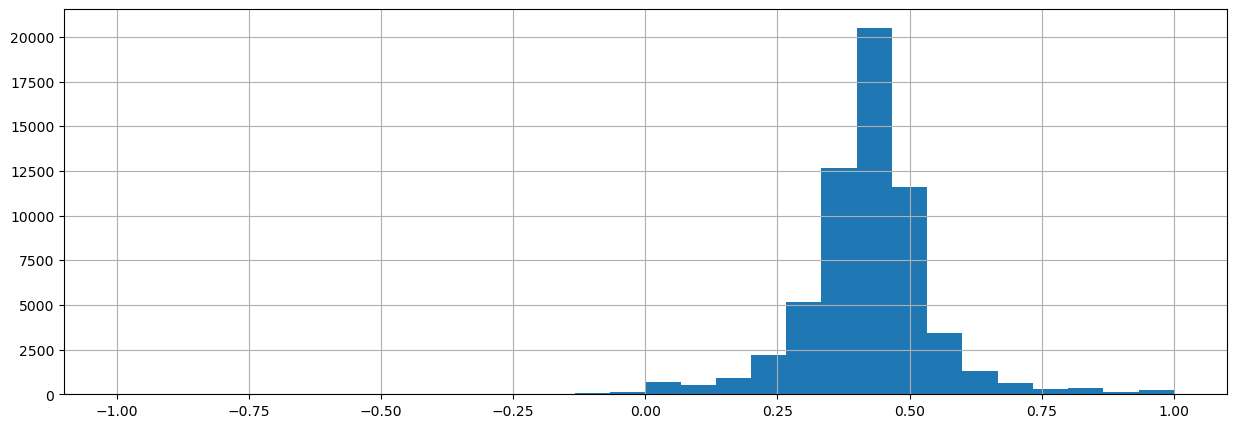

In [447]:
#check sentiment score distribution
merged_data.avg_sentiment.hist(figsize=(15,5), bins=30);

## Still need to add columns for the location stats

---
# **Exploratory Analysis**

## **Feature Engineering for Rating on each listing - STILL A WORK IN PROGRESS**

**Step 1:** Correlation Analysis and Variable Selection
- Correlation Analysis: Calculate correlations between variables, understanding the relationships between independent variables and the target variable (dependent variable).
- Variable Selection: Use methods like multiple regression, feature importance, or statistical tests to identify significant independent variables that predict the target variable.

**Step 2:** Time Series Forecasting
- Treat Variables as Time Series: Convert selected independent variables into time series data.
- Forecasting: Use methods like regression-based time series forecasting (ARIMA, SARIMA) or exponential smoothing (like Holt-Winters) to predict the next values in these time series.

**Step 3:** Incorporate Forecasts into Regression
- Generate Forecasts: Obtain forecasts for the selected independent variables.
- Feature Engineering: Use these forecasts as new features in the regression model alongside the original variables.
- Regression Modeling: Incorporate the forecasted values as features in the regression model built in Step 1 to assess if these forecasts improve prediction accuracy.

In [222]:
#checking categorical columns
cat_cols = seattle_listings_sent.select_dtypes(include = ['object'])
cat_cols.columns

Index(['last_scraped', 'name', 'description', 'neighborhood_overview',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bedrooms', 'beds', 'calendar_last_scraped', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'num_bathrooms'],
      dtype='object')

In [223]:
numerical_col = seattle_listings_sent.select_dtypes(exclude=['object'])
numerical_col.columns

Index(['id', 'latitude', 'longitude', 'accommodates', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'instant_bookable', 'listing_id',
       'avg_sentiment_score'],
      dtype='object')

### Distribution of numerical features

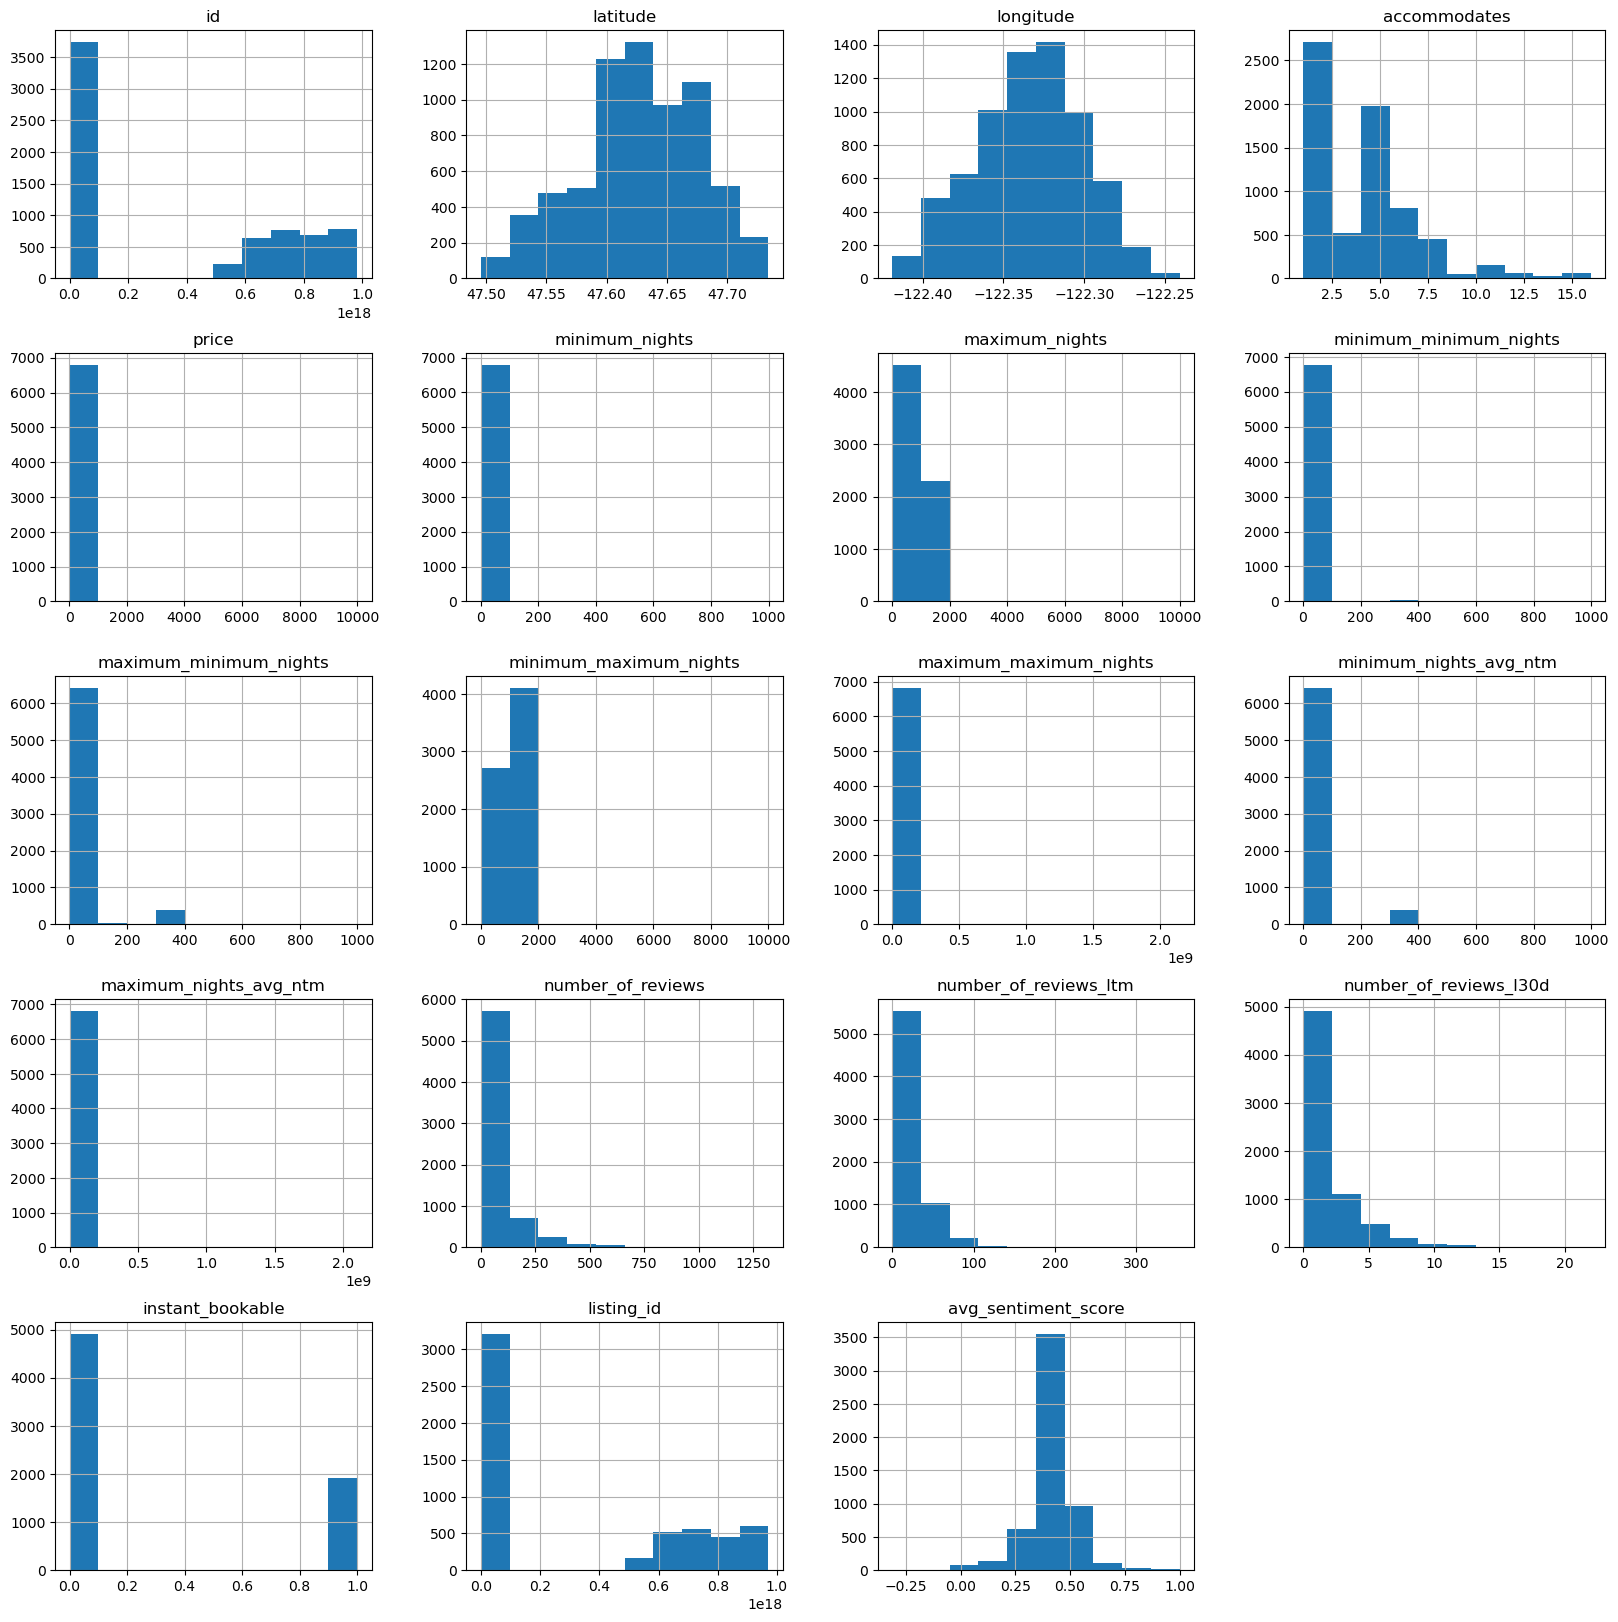

In [226]:
numerical_col.hist(figsize = (20,20))
plt.show()

### Correlations Between Features

C:\Users\12039\AppData\Local\Temp\ipykernel_34588\3274135519.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = seattle_listings_sent.corr()


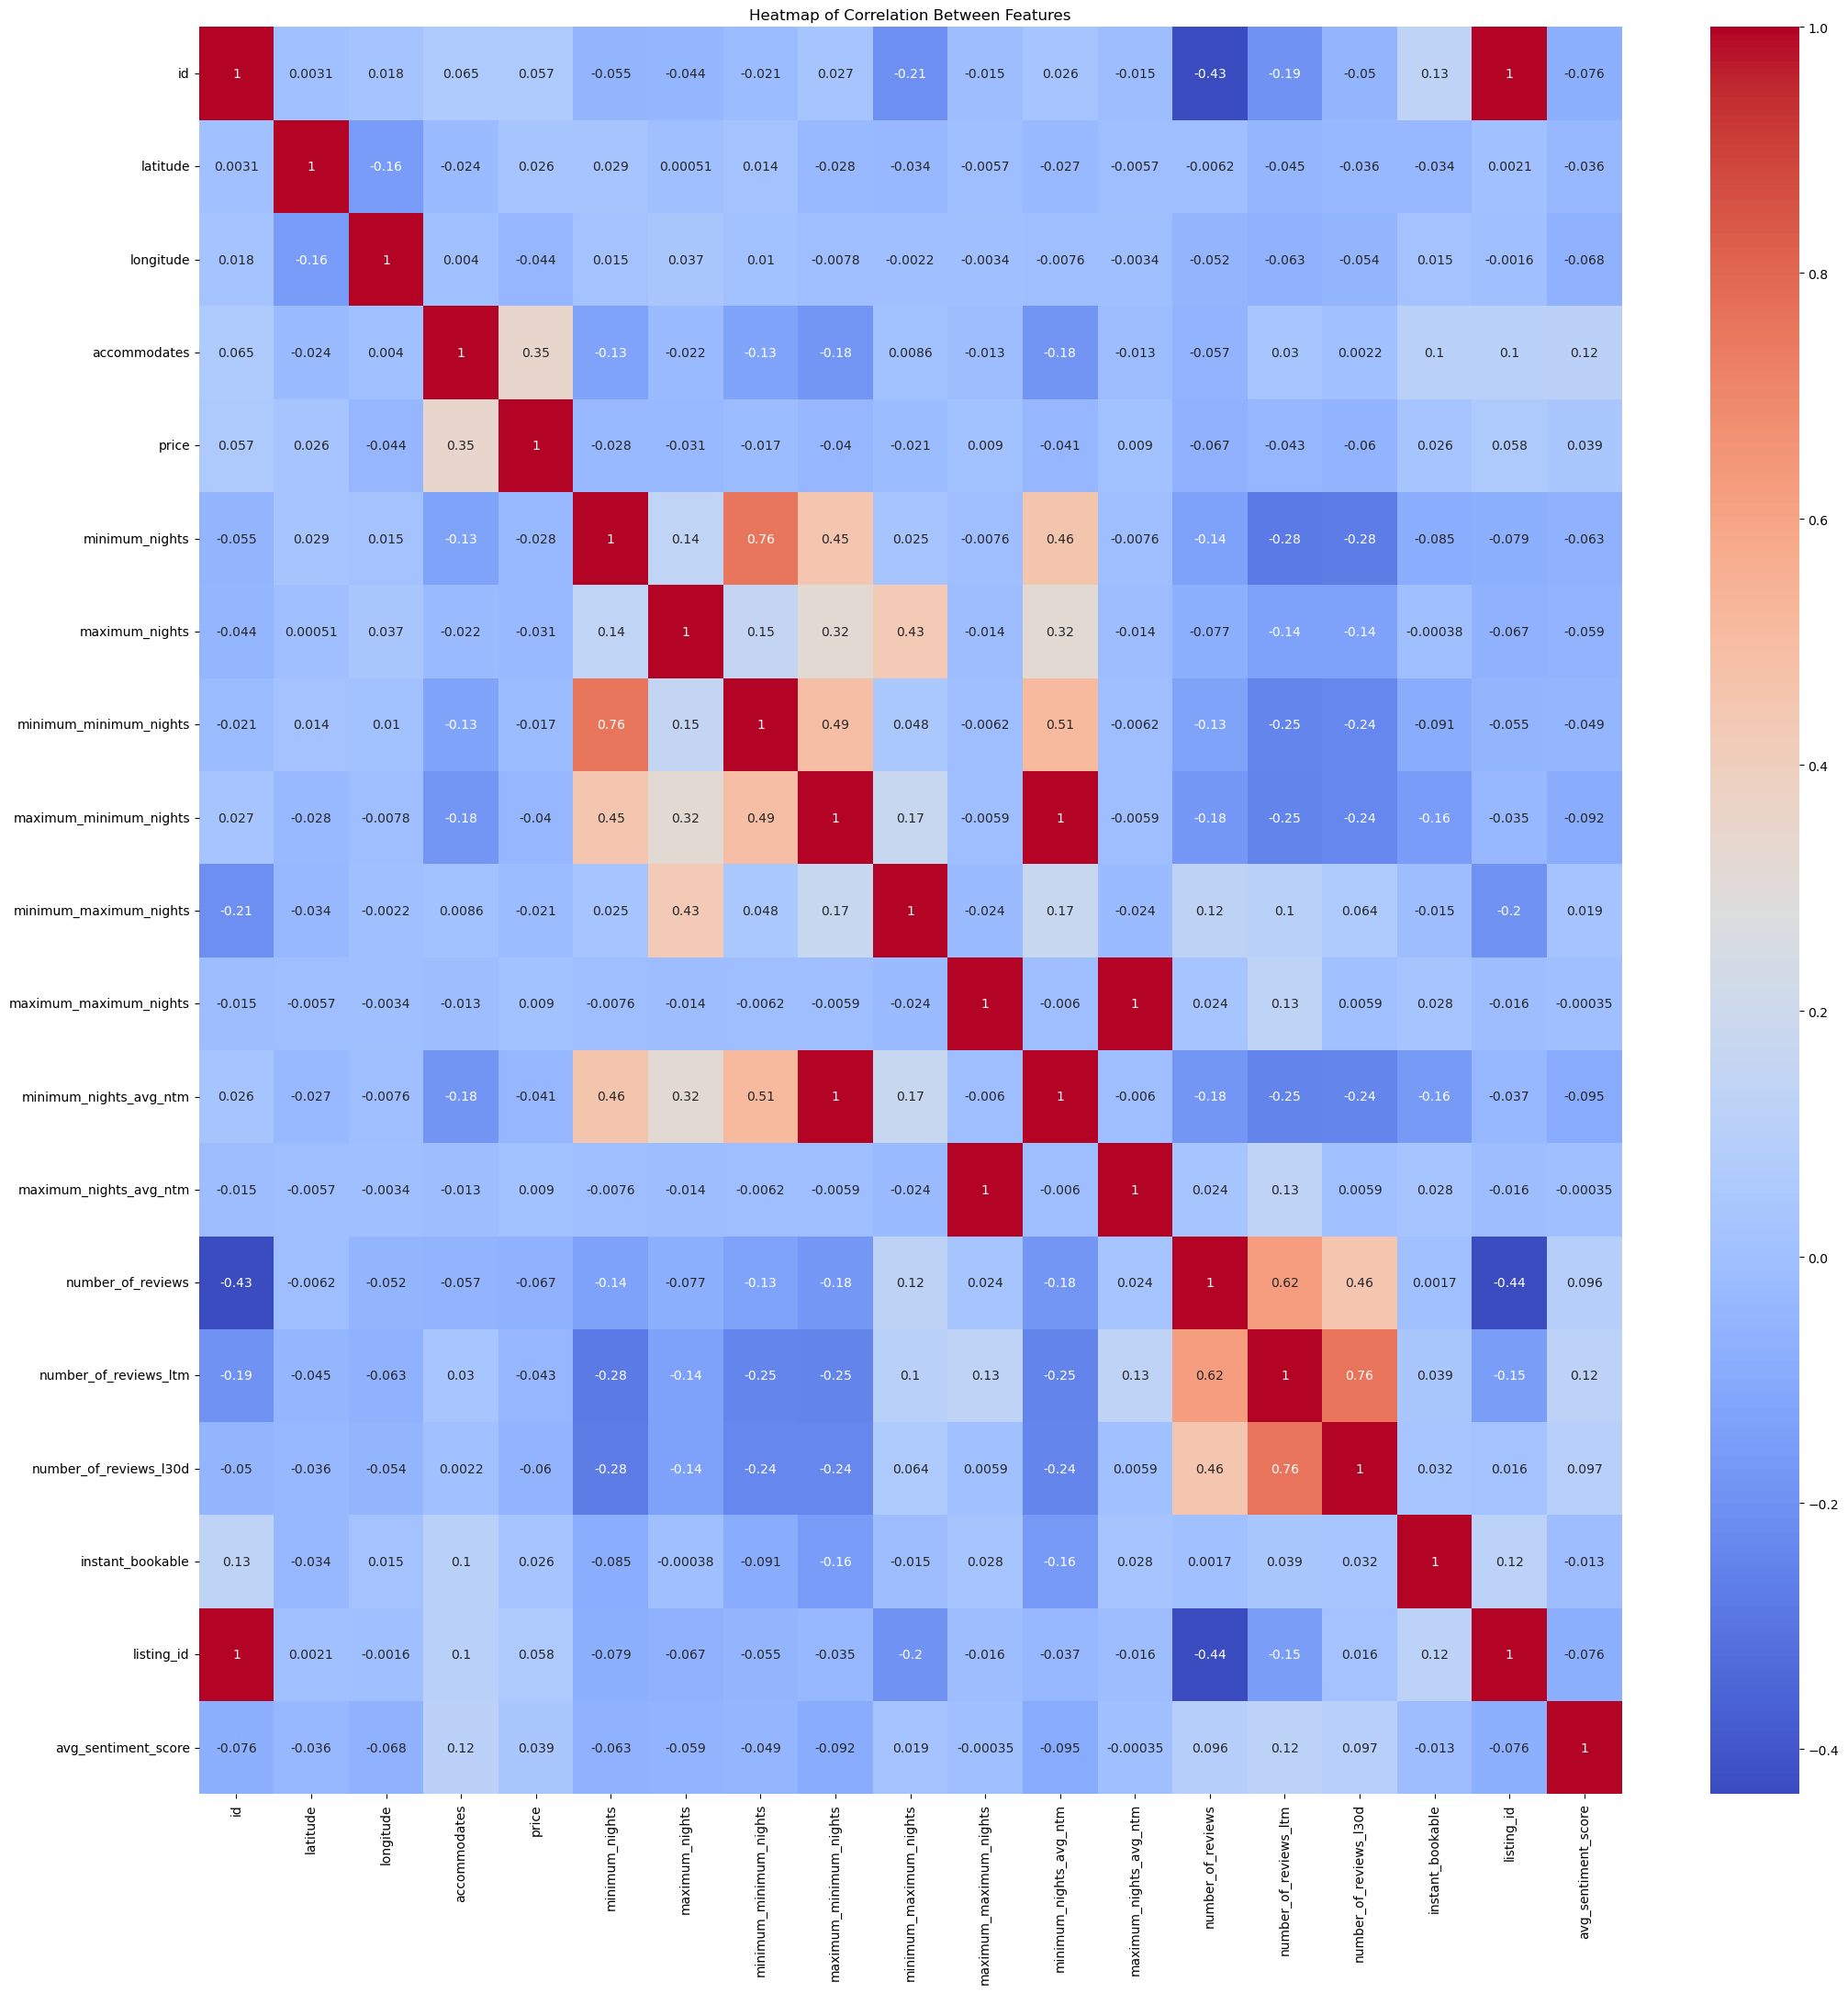

In [231]:
#  Correlations Between Features
# set up figure size
fig, ax = plt.subplots(figsize=(25, 25))

# set up correlation matrix
corr = seattle_listings_sent.corr()

sns.heatmap(corr, cmap = 'coolwarm', annot = True)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Features");

plt.show()

In [235]:
# removing features with high correlation
# Create a correlation matrix
corr_matrix = seattle_listings_sent.corr().abs()

# Set the threshold for dropping high correlation features
threshold = 0.8

# Find the features with high correlation
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.append(colname)

# Drop the high correlation features from the DataFrame
seattle_listings_sent.drop(columns=high_corr_features, inplace=True)


C:\Users\12039\AppData\Local\Temp\ipykernel_34588\14430081.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = seattle_listings_sent.corr().abs()


In [239]:
# select relevant features for feature extraction
features = ['property_type', 'room_type', 'num_bathrooms', 'price', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

# create a new dataframe with the selected features
seattle_listings_sent_features = seattle_listings_sent[features]

In [240]:
seattle_listings_sent_features.isna().sum()

property_type                  0
room_type                      0
num_bathrooms                  0
price                          0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [245]:
# perform one-hot encoding on categorical data
categorical_features = ['property_type', 'room_type']
categorical_transformer = OneHotEncoder()

In [248]:
# perform feature scaling on numerical data
numerical_features = ['num_bathrooms', 'price', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
numerical_transformer = StandardScaler()

### Correlation Analysis of listing df

#function to plug df into
def plot_correlation_heatmap(df, box_size=8, font_scale=0.8, aspect=1.5):
    correlation_matrix = df.corr()
    
    plt.figure(figsize=(20, box_size))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": font_scale*10})
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(cleaned_seattle_listings)

### 1. Compute the correlation matrix: Calculate the correlation coefficients between all independent variables and the target variable (review_scores).

In [295]:
# Compute the correlation matrix
correlation_matrix = cleaned_seattle_listings.corr()

# Filter out features with 'review_scores' in their names
excluded_features = [col for col in correlation_matrix.columns if 'review_scores' in col]

# Compute the correlation of other columns with 'review_scores_rating'
correlation_with_target = correlation_matrix['review_scores_rating'].drop(excluded_features)

# Set a threshold for selecting highly correlated features
threshold = 0.1  # Modify as needed

# Identify features highly correlated with 'review_scores_rating'
highly_correlated_features = correlation_with_target[
    (correlation_with_target > threshold) | (correlation_with_target < -threshold)
].index.tolist()

# Exclude highly correlated features from the list of variables for prediction
variables_for_prediction = [
    col for col in correlation_with_target.index if col not in highly_correlated_features
]
print(highly_correlated_features)

['minimum_nights', 'maximum_nights', 'maximum_minimum_nights', 'minimum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'reviews_per_month']


C:\Users\12039\AppData\Local\Temp\ipykernel_34588\2024207261.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_seattle_listings.corr()


### 2. Select variables with high correlation: Identify the variables that have a relatively high absolute correlation with the target variable.

In [291]:
threshold = 0.5
relevant_variables = target_correlation[target_correlation > threshold].index.tolist()
print(relevant_variables)

['review_scores_rating', 'review_scores_accuracy', 'review_scores_value', 'review_scores_communication', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location']


### Use multiple regression to identify independent variables to predict review_scores_rating

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'review_scores_rating' is the target variable
target_variable = 'review_scores_rating'

# Define independent variables
independent_variables = ['feature1', 'feature2', 'feature3']  # Replace with your chosen features

# Prepare data
X = cleaned_seattle_listings[independent_variables].values
y = cleaned_seattle_listings[target_variable].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Extract coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
